## Basic implementation of Neural Network using numpy


In [113]:
# Use the following command to install required packages

# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
class Layer:
    __slots__ = ['weights', 'biases', 'activation', 'biases_gradient', 'weights_gradient', "activation_derivative"]

    def __init__(self, nodes_in, nodes_out, activation='sigmoid'):
        self.weights = np.random.normal(size=(nodes_in, nodes_out))
        self.biases = np.random.normal(size=(1, nodes_out))
        self.biases_gradient = np.zeros(self.biases.shape)
        self.weights_gradient = np.zeros(self.weights.shape)
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif activation == 'linear':
            self.activation = self.linear
            self.activation_derivative = self.linear_derivative

    def calculate_layer(self, input):
        """
        Calculate the output of the layer
        Takes in a numpy array and returns a numpy array
        """
        return self.activation(np.dot(input, self.weights) + self.biases)

    def sigmoid(self, x):
        """
        Sigmoid activation function
        Takes in a numpy array and returns a numpy array
        """
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(self, x):
        """
        Sigmoid derivative function
        Takes in a numpy array and returns a numpy array
        """
        return x * (1 - x)

    def linear(self, x):
        """
        Linear activation function
        Takes in a numpy array and returns a numpy array
        """
        return x

    def linear_derivative(self, x):
        """
        Linear derivative function
        Takes in a numpy array and returns a numpy array
        """
        return np.ones_like(x)

    def report_layer(self, layer_num):
        return f'Layer number {layer_num}\nWeights\n{self.weights}\nbiases\n{self.biases}'

    def apply_gradient(self, learning_rate):
        self.weights -= learning_rate * self.weights_gradient
        self.biases -= learning_rate * self.biases_gradient

In [116]:
class NeuralNetwork:
    __slots__ = ['hidden_layers', 'layers']

    def __init__(self, hidden_layers, input_size, output_size):
        self.hidden_layers = hidden_layers
        self.layers = []

        # Create the input layer
        input_layer = Layer(1, hidden_layers[0])
        self.layers.append(input_layer)

        # Create the hidden layers
        for input_size, output_size in zip(hidden_layers, hidden_layers[1:]):
            self.layers.append(Layer(input_size, output_size))

        # Create the output layer
        output_layer = Layer(hidden_layers[-1], 1, activation='linear')
        self.layers.append(output_layer)

    def forward(self, input):
        """
        Takes a input and returns the output of the network
        """
        for layer in self.layers:
            input = layer.calculate_layer(input)
        return input

    def train(self, input, output, learning_rate=0.003, batch_size_frac=0.1):
        """
        Train the network on a given dataset
        """
        for i in range(2000):
            
            self.calculate_gradient(input, output)
            self.apply_gradient(learning_rate)
            if i % 100 == 0:
                print(f'Epoch {i} MSE: {self.mean_squared_error(input, output)}')

    def backpropagation(self, input, output):
        """
        Perform backpropagation on the network
        """
        pass

    def mean_squared_error(self, input, output):
        """
        Calculate the mean squared error of the network on a given dataset and output
        """
        mse = []
        for i,j in zip(input, output):
            mse.append((j - self.forward(i)) ** 2)
        return np.mean(mse)

    def mean_squared_error_gradient(self, predicted, true):
        """
        Calculate the gradient of the mean squared error
        """
        return 2 * (predicted - true)
        

    def visualize(self):
        """
        Visualize the network architecture
        """
        for i, layer in enumerate(self.layers):
            print(layer.report_layer(i))
            print("\n")

    def apply_gradient(self, learning_rate):
        for layer in self.layers:
            layer.apply_gradient(learning_rate)

    def calculate_gradient(self, input, output):
        """
        Calculate the gradient of the network
        """
        h = 0.0001
        original_mse = self.mean_squared_error(input, output)

        for layer in self.layers:
            for i in range(layer.weights.shape[0]):
                for j in range(layer.weights.shape[1]):
                    layer.weights[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.weights_gradient[i, j] = (new_mse - original_mse) / h
                    layer.weights[i, j] -= h

            for i in range(layer.biases.shape[0]):
                for j in range(layer.biases.shape[1]):
                    layer.biases[i, j] += h
                    new_mse = self.mean_squared_error(input, output)
                    layer.biases_gradient[i, j] = (new_mse - original_mse) / h
                    layer.biases[i, j] -= h

# First set

In [117]:
square_simple = pd.read_csv('../data/regression/square-simple-test.csv', index_col=0)

,x,y
1,-0.980437,-43.486918
2,-1.219074,3.752808
3,0.124243,-128.610721
4,1.227789,5.671828
5,1.067348,-27.469169
...,...,...
96,1.315377,25.719403
97,-1.196968,-1.054107
98,1.544766,84.767303
99,0.441051,-112.492699


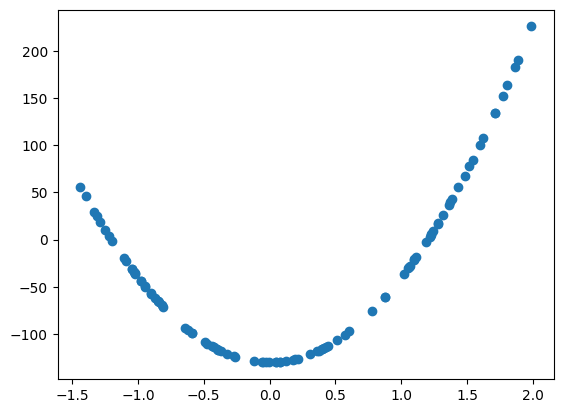

In [118]:
# scater plot of the data
plt.scatter(square_simple['x'], square_simple['y'])
square_simple

In [119]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])
neural1.train(square_simple["x"], square_simple["y"])
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 8516.848033521283
Epoch 100 MSE: 5195.858818180445
Epoch 200 MSE: 4526.860332410657
Epoch 300 MSE: 4149.96400695786
Epoch 400 MSE: 3774.689649501028
Epoch 500 MSE: 3395.987345279433
Epoch 600 MSE: 3056.461118197411
Epoch 700 MSE: 2760.311304428427
Epoch 800 MSE: 2503.787822373348
Epoch 900 MSE: 2280.7583346507627
Epoch 1000 MSE: 2084.335318805812
Epoch 1100 MSE: 1910.7588490522528
Epoch 1200 MSE: 1757.0428074832762
Epoch 1300 MSE: 1619.816380486454
Epoch 1400 MSE: 1496.6377251511306
Epoch 1500 MSE: 1386.1286271807185
Epoch 1600 MSE: 1286.8963327135984
Epoch 1700 MSE: 1197.6898897362478
Epoch 1800 MSE: 1117.3801889728818
Epoch 1900 MSE: 1044.949121060441


980.1055212683351

Layer number 0
Weights
[[-10.55797225 -11.48267626 -11.44710805 -14.08859405 -10.0563897 ]]
biases
[[ 13.77022818  15.41418215   9.02299985 -11.95047704  10.03130811]]


Layer number 1
Weights
[[-47.98674309]
 [-51.63075023]
 [-39.59299594]
 [ 73.42935549]
 [-47.50487271]]
biases
[[83.89645855]]


None


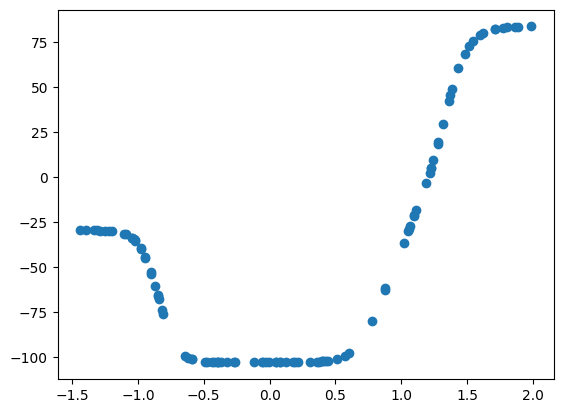

In [120]:
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y)
print(neural1.visualize())

# try how its working on normalized dataset

Epoch 0 MSE: 0.9145166125060864
Epoch 100 MSE: 0.8690083929390228
Epoch 200 MSE: 0.8401633517624607
Epoch 300 MSE: 0.8164396135026314
Epoch 400 MSE: 0.7963178527224268
Epoch 500 MSE: 0.7789850995218237
Epoch 600 MSE: 0.7638339360405757
Epoch 700 MSE: 0.750394107136968
Epoch 800 MSE: 0.7382979103049334
Epoch 900 MSE: 0.7272560374166956
Epoch 1000 MSE: 0.717039917067044
Epoch 1100 MSE: 0.7074685342181226
Epoch 1200 MSE: 0.6983984185721884
Epoch 1300 MSE: 0.689715923018645
Epoch 1400 MSE: 0.6813311903818673
Epoch 1500 MSE: 0.6731733884987464
Epoch 1600 MSE: 0.6651869148048749
Epoch 1700 MSE: 0.6573283535555453
Epoch 1800 MSE: 0.6495640251377085
Epoch 1900 MSE: 0.6418680063369164


0.6342968154527775

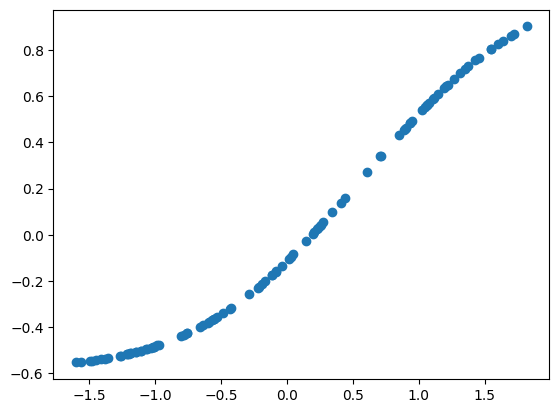

In [136]:
# normalize the data
square_simple_normalized = square_simple.copy()
square_simple_normalized["x"] = (square_simple["x"] - square_simple["x"].mean()) / square_simple["x"].std()
square_simple_normalized["y"] = (square_simple["y"] - square_simple["y"].mean()) / square_simple["y"].std()

# train the network
neural1 = NeuralNetwork([5], 1, 1)
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])
neural1.train(square_simple_normalized["x"], square_simple_normalized["y"])
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

# plot the result
y = []
for i in square_simple_normalized["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple_normalized["x"], y)
neural1.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

2.255982606987352

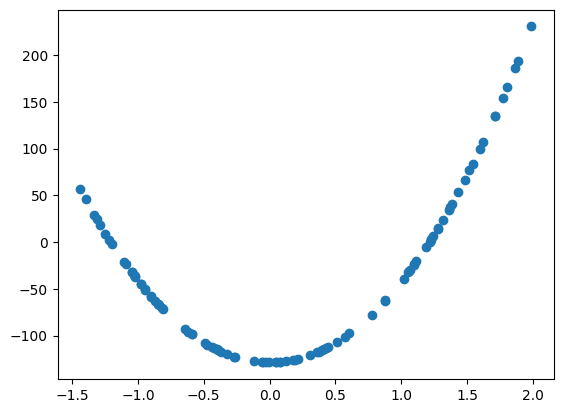

In [121]:
neural1.layers[0].biases =  np.array([[-2.9,-2.8897,-2.8897,-2.8897,-2.8897]])
neural1.layers[0].weights = np.array([[-0.9733, -0.9733, -0.9733, -0.9733, 0.9733]])
neural1.layers[1].weights = np.array([[502], [502], [502], [502], [1993]])
neural1.layers[1].biases = np.array([[-339.16]])
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y)
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

In [122]:
neural2 = NeuralNetwork([10], 1, 1)
neural2.mean_squared_error(square_simple['x'], square_simple['y'])
neural2.train(square_simple["x"], square_simple["y"])
neural2.mean_squared_error(square_simple["x"], square_simple["y"])

Epoch 0 MSE: 8518.197917834665
Epoch 100 MSE: 4120.927173130985
Epoch 200 MSE: 3281.1654997192645
Epoch 300 MSE: 2815.8021082344385
Epoch 400 MSE: 2497.7033372215637
Epoch 500 MSE: 2255.370434621555
Epoch 600 MSE: 2056.5821541740625
Epoch 700 MSE: 1884.6788506887608
Epoch 800 MSE: 1730.6070329439679
Epoch 900 MSE: 1591.2535635561674
Epoch 1000 MSE: 1465.8999108095952
Epoch 1100 MSE: 1353.746856082552
Epoch 1200 MSE: 1253.4925289353337
Epoch 1300 MSE: 1163.5934820167463
Epoch 1400 MSE: 1082.7852895288154
Epoch 1500 MSE: 1010.1034493309853
Epoch 1600 MSE: 944.6730281351047
Epoch 1700 MSE: 885.6329970638653
Epoch 1800 MSE: 832.1469390789509
Epoch 1900 MSE: 783.4554128400548


739.3609841230829

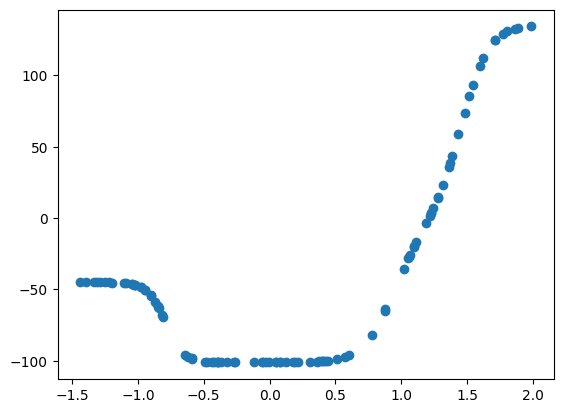

In [123]:
y = []
for i in square_simple["x"]:
    y.append(neural2.forward(i))
plt.scatter(square_simple["x"], y)

In [124]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.mean_squared_error(square_simple['x'], square_simple['y'])
# neural3.train(square_simple["x"], square_simple["y"])
# neural3.mean_squared_error(square_simple["x"], square_simple["y"])

8665.260439367577

# Second set

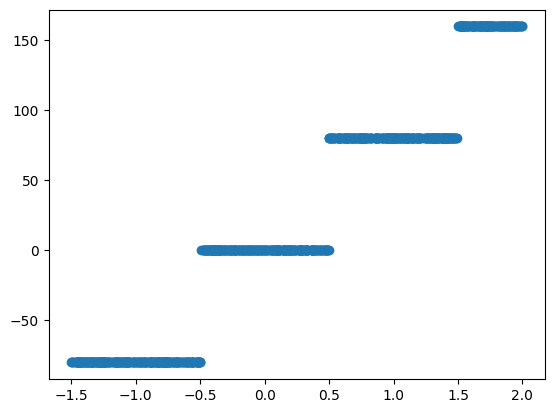

In [125]:
steps_large = pd.read_csv("../data/regression/steps-large-test.csv", index_col=0)
plt.scatter(steps_large["x"], steps_large["y"])

In [126]:
neural4 = NeuralNetwork([5], 1, 1)
neural4.mean_squared_error(steps_large["x"], steps_large["y"])
neural4.train(steps_large["x"], steps_large["y"])
neural4.mean_squared_error(steps_large["x"], steps_large["y"])

Epoch 0 MSE: 7331.0497641310485
Epoch 100 MSE: 2993.7307737129927
Epoch 200 MSE: 1672.454099640688
Epoch 300 MSE: 1191.7054310157607
Epoch 400 MSE: 893.5021904920021
Epoch 500 MSE: 691.9812168242296
Epoch 600 MSE: 544.3503907951681
Epoch 700 MSE: 442.70303349866646
Epoch 800 MSE: 376.5310429442026
Epoch 900 MSE: 332.834129225353
Epoch 1000 MSE: 302.3667858002931
Epoch 1100 MSE: 279.53205061720286
Epoch 1200 MSE: 260.87308087816285
Epoch 1300 MSE: 243.67952023388892
Epoch 1400 MSE: 226.73172295880758
Epoch 1500 MSE: 212.7097792262382
Epoch 1600 MSE: 201.66064997942624
Epoch 1700 MSE: 192.4936398068851
Epoch 1800 MSE: 184.69549106872972
Epoch 1900 MSE: 177.95235987213871


172.09377230063652

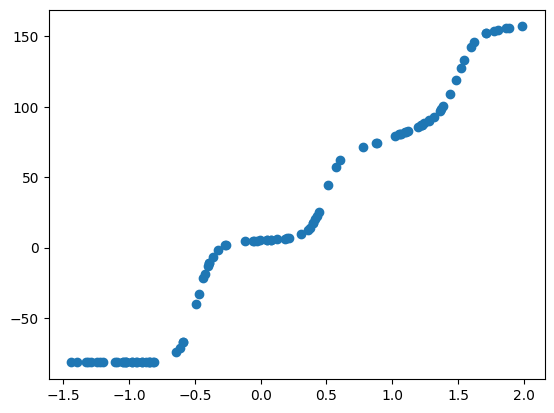

In [127]:
y = []
for i in square_simple["x"]:
    y.append(neural4.forward(i))
plt.scatter(square_simple["x"], y)

In [133]:
neural5 = NeuralNetwork([10], 1, 1)
neural5.mean_squared_error(steps_large["x"], steps_large["y"])
# neural5.train(steps_large["x"], steps_large["y"])
# neural5.mean_squared_error(steps_large["x"], steps_large["y"])

7560.0669420173335

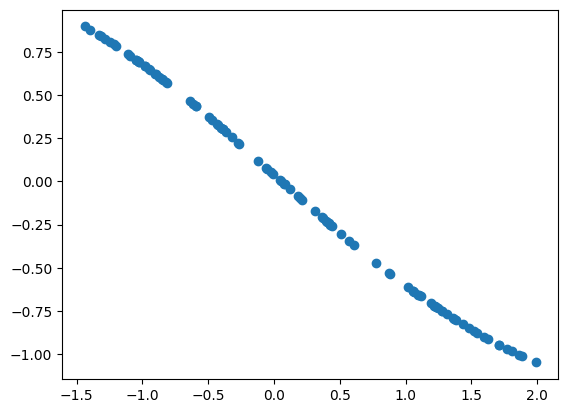

In [134]:
y = []
for i in square_simple["x"]:
    y.append(neural5.forward(i))
plt.scatter(square_simple["x"], y)

In [ ]:
neural6 = NeuralNetwork([5,5], 1, 1)
neural6.mean_squared_error(steps_large["x"], steps_large["y"])